In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
train_data = pd.read_csv('train_tweets.csv')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [56]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [14]:
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Cleaning the data

In [16]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [17]:
def process_tweet():
    #return ",".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower().split()))
    #train_data['processed_tweets'] = train_data['tweet'].str.replace('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])', '')
    train_data['processed_tweets'] = train_data['tweet'].str.replace('[^A-Za-z0-9 ]', '')
    train_data['processed_tweets'] = train_data['processed_tweets'].str.replace('@[a-zA-Z0-9]+', '')

In [18]:
import re
## example ## 
print("Text before filtering:\nouch...junior is angryð#got7 #junior #yugyo..., @user")
print("\n\nText after filtering:")
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "","ouch...junior is angryð#got7 #junior #yugyo..., @user")

Text before filtering:
ouch...junior is angryð#got7 #junior #yugyo..., @user


Text after filtering:


'ouchjunior is angrygot7 junior yugyo '

In [19]:
#train_data['processed_tweets'] = train_data['tweet'].apply(process_tweet)
process_tweet()

train_data.head(10)

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user user use...
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here im its so gr8


In [20]:
drop_features(['id','tweet'],train_data)

In [21]:
train_data.head(10)

,label,processed_tweets
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation
5,0,22 huge fan fare and big talking before they l...
6,0,user camping tomorrow user user user user use...
7,0,the next school year is the year for exams can...
8,0,we won love the land allin cavs champions clev...
9,0,user user welcome here im its so gr8


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
label               31962 non-null int64
processed_tweets    31962 non-null object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [23]:
train_data['processed_tweets'] = train_data['processed_tweets'].apply(lambda x: x.split())
train_data.head(10)

,label,processed_tweets
0,0,"[user, when, a, father, is, dysfunctional, and..."
1,0,"[user, user, thanks, for, lyft, credit, i, can..."
2,0,"[bihday, your, majesty]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguide, society, now, motivation]"
5,0,"[22, huge, fan, fare, and, big, talking, befor..."
6,0,"[user, camping, tomorrow, user, user, user, us..."
7,0,"[the, next, school, year, is, the, year, for, ..."
8,0,"[we, won, love, the, land, allin, cavs, champi..."
9,0,"[user, user, welcome, here, im, its, so, gr8]"


In [24]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
train_data['processed_tweets']= train_data['processed_tweets'].apply(lambda x: [stemmer.stem(i) for i in x])
train_data.head(10)

,label,processed_tweets
0,0,"[user, when, a, father, is, dysfunct, and, is,..."
1,0,"[user, user, thank, for, lyft, credit, i, cant..."
2,0,"[bihday, your, majesti]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguid, societi, now, motiv]"
5,0,"[22, huge, fan, fare, and, big, talk, befor, t..."
6,0,"[user, camp, tomorrow, user, user, user, user,..."
7,0,"[the, next, school, year, is, the, year, for, ..."
8,0,"[we, won, love, the, land, allin, cav, champio..."
9,0,"[user, user, welcom, here, im, it, so, gr8]"


In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
import string

def process(text):
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    nopunc = " ".join(nopunc)
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

train_data['processed_tweets'] = train_data['processed_tweets'].apply(process)
train_data.head(10)

,label,processed_tweets
0,0,"[kid, drag, run, father, selfish, user, dysfunct]"
1,0,"[dont, credit, caus, disapoint, wheelchair, ca..."
2,0,"[bihday, majesti]"
3,0,"[model, ur, love, take, u, time]"
4,0,"[motiv, factsguid, societi]"
5,0,"[chao, pay, disput, 22, talk, leav, fare, huge..."
6,0,"[tomorrow, user, danni, camp]"
7,0,"[school, actorslif, next, year, cant, imagin, ..."
8,0,"[cav, allin, champion, love, clevelandcavali, ..."
9,0,"[gr8, welcom, im, user]"


In [26]:
def join_tokens(tweet):
    return " ".join(tweet)

train_data['processed_tweets'] = train_data['processed_tweets'].apply(join_tokens)

In [27]:
train_data.head(10)

,label,processed_tweets
0,0,kid drag run father selfish user dysfunct
1,0,dont credit caus disapoint wheelchair cant van...
2,0,bihday majesti
3,0,model ur love take u time
4,0,motiv factsguid societi
5,0,chao pay disput 22 talk leav fare huge get fan...
6,0,tomorrow user danni camp
7,0,school actorslif next year cant imagin girl ha...
8,0,cav allin champion love clevelandcavali clevel...
9,0,gr8 welcom im user


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data["processed_tweets"],train_data["label"], test_size = 0.2, random_state = 42)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 30232)
(25569, 30232)


In [30]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 30232)
(6393, 30232)


# Decision Tree 

In [36]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(x_train_tfidf,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
predDT = model1.predict(x_test_tfidf)

In [38]:
c_m1 = confusion_matrix(y_test,predDT)
print(c_m1)

[[5752  185]
 [ 188  268]]


In [39]:
accuracy_score(y_test,predDT)

0.9416549350852494

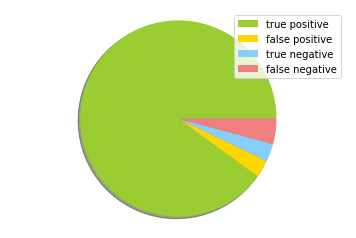

In [40]:
labels = 'true positive','false positive','true negative','false negative'
a,b,c,d=c_m1[0][0],c_m1[0][1],c_m1[1][0],c_m1[1][1]
sizes = [a,b,c,d]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')

plt.show()

# K nearest neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [42]:
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 10): 
    model2 = KNeighborsClassifier(n_neighbors = k) 
    model2.fit(x_train_tfidf,y_train) 
  
    #training_score = clf.score(x_train_tfidf,y_train) 
    predKNN = model2.predict(x_test_tfidf)
    test_score = model2.score(x_test_tfidf, y_test) 
    K.append(k) 
  
    #training.append(training_score) 
    test.append(test_score)

In [43]:
c_m2 = confusion_matrix(y_test,predKNN)
print(c_m2)

print("\n\nAccuracy:")
print(test)

[[5937    0]
 [ 401   55]]


Accuracy:
[0.9411856718285625, 0.9410292507430001, 0.9397778820585014, 0.9399343031440638, 0.9380572501173158, 0.9380572501173158, 0.9372751446895041, 0.9372751446895041]


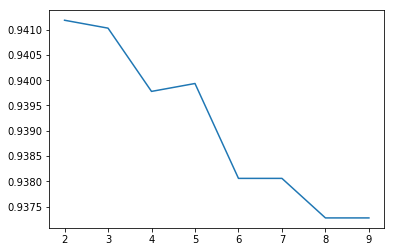

In [44]:
plt.plot(range(2,10),test)

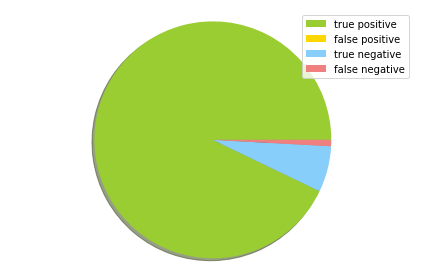

In [45]:
labels = 'true positive','false positive','true negative','false negative'
a,b,c,d=c_m2[0][0],c_m2[0][1],c_m2[1][0],c_m2[1][1]
sizes = [a,b,c,d]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier

model3 = Radata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAagAAAEYCAYAAAAJeGK1AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3Xl8U2X+L/DPOVmbJm26l26UrXQBYhssizBRcAERBgQURRlnhorMz3EBFe6dUa8bV3SY8eK4YBW3wW0UBVFQESwosjVQpAubFCht6ZqtzX7O/SMpIhYo0OZJmu/79coLaLN8KKWfPOc853k4URRBCCGEBBuedQBCCCGkM1RQhBBCghIVFCGEkKBEBUUIISQoUUERQggJSlRQhBBCghIVFCGEkKBEBUUIISQoUUERQggJSlRQhBBCghIVFCGEkKBEBUUIISQoUUERQggJSlRQhBBCgpKUdQBCCLlYpaWliVKp9HUAQ0BvtIOVAGC/x+OZq9frGy7lCaigCCEhRyqVvp6cnJyTkJDQyvM8bWoXhARB4BobG3Pr6+tfBzDlUp6D3nkQQkLRkISEBAuVU/DieV5MSEgwwzfKvbTn6MY8hBASKDyVU/Dz/xtdcs9QQRFCCAlKdA6KEBLyio16fXc+X1FBaen5Pt/U1CR5/fXXYxcvXtzYna/b3QwGw8BPPvnkKACcmbe6ulp2zz33pG/YsOFntgnPjwqKkAsoNuoVAOIAxJ7jFgNABsANwHXWr2f/3gmgCUAdgHoAdUUFpc4A/nVIN2hubpa88cYbiZ0VlMfjgVQaHD9aS0pKDgPAgQMH5GfmzczMdAd7OQFUUIQAAIqN+jQAuf5bjv/XTPiKKaKHX7sVQA2AowCq/b8eBXAYQFVRQam3J1+fXLyFCxemnThxQpGdnZ1rMBgskydPNj/11FN9EhMT3RUVFaovv/zy0E033TTo0KFD5QDw2GOPJdlsNsk///nP2vLycsU999yT0dLSIlUqlcLrr79+LD8/33Hm8y9YsCDl559/VtTX18vq6urk9913X/3ChQubBEHA/Pnz0zZt2hTNcZz48MMP1xUVFbUeO3ZMNn369P42m03i9Xq5F1988diECRNsqampQ3fv3l15dt4FCxY0dOQbNmxY9sqVK6uHDx/uAIDCwsLBy5YtO6HT6Rx//vOfMyorKyO8Xi/3t7/9rfaOO+4wBfLrTAVFwkqxUd8XwFD8uoiyAUQxjBXjvw3t5HNtxUb9HgC7Aezy3w4XFZTSBAGGli1bVnPTTTdFVFVVVQDAunXrNPv27Yvcs2dPeXZ2tuvAgQPycz127ty5fV977bVjQ4cOdW7atCly/vz5Gdu3bz949v0qKysjSktLK61WqyQ/Pz93+vTp5u+++y7yp59+iqisrCyvq6uTFhYW5lx//fW2lStXxo4fP968dOnSeo/HA6vV+qv5BWfnPTPf9OnTW1atWhU7fPjw2mPHjskaGhpkY8eObb/33ntTr7nmGst///vf6qamJsnw4cNzpkyZYomKihK67yt5flRQpNcqNuo5+Arod/7bWACpTENdvEgAY/y3DqZio74UvxTWrqKC0hMswpFfDBs2rC07O9t1vvuYzWZ+z5496pkzZw7o+JjL5eI6u+/EiRNNarVaVKvVnlGjRlm2bt0auXXrVs0tt9zSIpVKkZ6e7hkxYoTt+++/V40cObJt3rx5mW63m58xY0br6NGj7V3NPWfOnNZrr70261//+lftO++8EzN58uRWAPjuu++ivvrqK+3y5cuTAcDpdHKHDx+WFxQUOM7/jN2HCor0Kv5DdTcAuB7AOADxbBP1CC2A8f4bAKDYqD8C4HMAawFsLSoo9TDKFrZUKtXpkYVUKhUF4ZeBhsPh4AHA6/VCo9F4OkYy58Nx3G/+LIqdD5wnTpxo27Jly4FPPvkk+q677up33333nbr33nubu5K7X79+bq1W69mxY0fE6tWrY1esWHEMAERRxMcff3xYp9MxO0dK08xJSCs26rlio/53xUb9C8VGfQWAEwBeB3ALemc5ncsAAA8A2ASgsdiof6/YqJ9VbNRHM87VK0VHR3vb2trO+fMzLS3N09LSIq2vr5fY7Xbuq6++igaA2NhYIS0tzbVy5coYABAEAT/++GOn5zjXr1+vbW9v5+rr6yXbt2/XjBkzps1gMFg//vjjWI/Hg9raWunOnTvVY8eObTt48KA8NTXVvXDhwqY77rijyWg0qi4m74wZM1qWLFmSbLVaJYWFhXYAuOaaayzLli1L6ijaH374oUfPxXaGRlAkJBUb9XkA7gRwG4AMxnGCjRa+r8ttANzFRv1W+EZWa4sKSo8yTdZDLjQtvLslJyd79Xq9bdCgQXnjxo0zT5482Xzm5xUKhbhw4cK6wsLCnLS0NOfAgQNPHxZ7//33fy4qKuq7dOnSPh6Ph5s2bVrLqFGjfnNILj8/v238+PGDamtr5Q899FBdZmamOyMjw7Rt2zZ1Tk5OHsdx4hNPPFGTkZHhefHFF+OWL1+eLJVKRZVK5V21atWv/p3PzrtgwYJfrY13xx13tD766KMZ999/f23Hx5599tnau+++OyM7OztXFEUuLS3NuXnz5sPd91W8MO5cQ0ZCgk2xUZ8K4HZRFGdzHKdjnSdE7QHwGoD/FBWU2liHuVRlZWXVOp2uiXWOnrJgwYIUtVrtffLJJ0+xznK5ysrK4nU6XealPJZGUCSoFRv1UQBmAJgtiuLVHMfxZx+bJxclH8ArAJ4rNurfA/BqUUHpXsaZCOkUjaBIUPIfwntYFMVbOY5Tss7Ty+0AsALAB0UFpV2e/cVSbx9B9SY0giK9RrFRP0YUxcUAbuR8WEcKByP8t38WG/XvwDeqqmSciRAqKMKe/3qlKYIgLuZ5biSVEjNaAPcBuK/YqN8I4KmigtItjDORMEYFRZgpNurlAGYLgriI57nBPE/FFESuBXBtsVH/HYD/U1RQWsI4DwlDVFAk4IqNehWA+YIgLuR5rg8VU1C7GsB3xUZ9CYBHiwpKtzLOQ8IIFRQJqNd2F9wqivgXL6FiCjEGAFuKjfovASwuKij9iXWgX6niunW7DWSLF7yu6umnn05cuXJlwpAhQ9rXrl3b6fVl69at0yxbtiwp0NcPdWbVqlXR5eXlEUuWLKl/9913tbm5uQ69Xu8AgAceeCDl6quvtk6dOtXKOueZqKBIQKzYVXCFxy2+LlfyeqqlkHYjgAnFRv0qAI8VFZRWM87DzBtvvJGwfv36Qxdafy9YzJ492wzADACfffaZ1uPxmDsK6oUXXqg974MZoaWOSI8qNurj//3DFe9yPIxyJd+973IJKzx8q3gcKDbqn/TvlxVWbr/99oyamhrFlClTBj7xxBOJmzdvVuXn52fn5OTk5ufnZ5eVlf3ma/LFF1+os7Ozc7Ozs3NzcnJyW1tbeQB49NFHk4YMGZKTlZWV++CDD6Z09noqlSq/qKgoLTc3N2fUqFFZtbW1UgDYtm1bhE6ny87Kysq97rrrBjQ2NkoA3+huwIABeVlZWbk33XRTfwBYvnx53Jw5czK++eabyI0bN2r//ve/p2VnZ+eWl5crpk+fnvnmm2/GfPTRR1E33nhj/47XXbdunWbcuHEDAWD16tVRV1xxRXZubm7OxIkT+5vN5h7vDyoo0iOKjXrpS9vyH/F6xGpFhOQOmi/eK8kBPApgb7FRP+ZCd+5N3nvvveOJiYnukpKSg48//niDTqdz7Ny5s6qysrLi8ccfP/nII4+knf2YZcuWJS9fvvxYVVVVxfbt26vUarWwevXqqMOHDyv37dtXWVlZWbF3717V+vXr1Wc/1m638wUFBe0VFRWVV111lXXx4sUpAHDXXXf1W7JkSc3Bgwcr8vLy7IsWLUoBgOXLlyfv37+/4uDBgxVvvfXWsTOf67rrrmu79tprTU8//XRNVVVVRV5e3unFYKdNm2bZs2dPpMVi4QHg/fffj5kxY0ZLXV2ddMmSJX22bNlysKKiorKgoKD9qaeeSurur+vZqKBIt3tlR/5Et1M4JFfySyVSLpJ1HtLjsuE7P/Wqf+WPsNPS0iK58cYbBwwaNCjvkUceST948OBvLi4fOXKk7aGHHkp/+umnE5uamiQymQwbNmyI2rJlS1Rubm5uXl5e7pEjR5RVVVW/eSzP85g7d24LAPzpT39q3rlzp7q5uVlitVolkyZNsgFAUVFR8/bt29UAMHjwYPu0adP6vfzyy7EymazLqzHIZDJcffXVlg8++CDa7XZj06ZN0bfddpvpu+++izxy5IiysLAwOzs7O/eDDz6IO378+Dn3vOoudA6KdJtioz7e0e59V6mSTGCdhQQcB2AegMnFRv3/FBWUfsY6UCAtWrQo1WAwWL/55psjBw4ckI8bN27w2fdZsmRJ/dSpU81r1qyJHj16dM6GDRsOiqKIBx54oO7hhx++qFUxLnRAYvPmzYfWr1+v+eyzz7TPPfdcyqFDh/Z39blnzZrV8tJLLyXGx8d7hw0b1h4TEyOIoogxY8ZYPv/884AuNkwjKNItnt8w9Ha3SzhC5RT2UgB8WmzUf1Js1PdhHSZQLBaLJC0tzQUAK1as6HSbl/LyckVhYaH9mWeeqR86dGjb/v37lRMnTrS8++678R3nc44ePSo7efLkbwYOgiDgzTffjAGAt956K66wsNAaFxfnjYqK8m7YsEENAG+88UbcqFGjbF6vF0eOHJFPnjzZ+vLLL9dYrVaJ2WyWnPl8arXa23EY72yTJk2ylpeXq4qLi+NnzpzZAgBXX3112+7du9X79+9XAIDVauX37dvX4+ceaQRFLsuyb4ZFiSLe1ybKb2SdhQSVmwGMLzbqFwF4rce3qO/CtPCetGjRovq5c+f2W758efLYsWMtnd3nueeeS9y2bVsUz/NiVlaWfcaMGeaIiAixvLxceeWVV2YDvk0PV61adTQ1NfVXG05GREQI5eXlEXl5eckajca7evXqnwHgzTffPDp//vy+9913H5+RkeF8//33qz0eD3f77bf3s1qtElEUuXnz5p2Kj4/3nvl8s2fPbpk/f37mq6++mvTxxx8fOfNzUqkU48ePN3/88cdxH330UTUApKSkeFasWFE9a9as/h07AD/++OMnhw0b1qObGdJiseSSPf1Z3vXaeNn7CpUklnUWEtQ+BzCnqKDU1F1PGG6LxapUqvz29vY9rHNcistZLJYO8ZGLVrSkH7dk7ZCXEtIU66mcSBdMBlBabNRfwToICS1UUOSi/K+3s/sPvlJTkZCm+AvPc/T9Q7qqP4Afi436P7IOEopCdfR0uegHDOmyv/0ne1baoIifouNk2ayzkJCkBLCy2KgvDseLe8nFo4IiF6QzaCWL3xz8XMZg1Sq5klexzkNC3lwAPxQb9Zmsg5DgRgVFzktn0Kon/Tl5/QCd+mFeQof0SLfRw3deaiLrICR40Q8cck4T/5ScNv3+1B39hkRexzoL6ZViAXxRbNQ/xjoICU50HRTp1KyH04dfc0vC2phEedhcbEmY4AA8UWzUJwP4n0u9XurZPe5uXYh4cb7svNdVNTU1SV5//fXYxYsXN3bn6wbSunXrNAqFQrjuuuvaAOC5555LUKlUwr333tvMOlsHGkGR37jricybR02K3UTlRAJoPoD/FBv1IfGmubm5WfLGG28kdvY5j8fT2YeDzqZNmzRbt249vTDtI4880hhM5QRQQZEz6Axabt5z/RddeX3M+6ooqYZ1HhJ2bgfwWbFRH8E6yIUsXLgw7cSJE4rs7OzcefPmpa1bt04zYsSIrMmTJ/cbPHhw3oEDB+SDBg3K67j/Y489lrRgwYIUwLfk0dixYwfl5eXl6PX6wXv27PnN4rALFixImTlzZmZhYeHgtLS0oU8//fTpMnz55Zdjhw4dmpOdnZ17++239+0oxH/961/xmZmZQwoLCwfPmjWr75w5czIA4L333oseNmxYdk5OTu7o0aOzTpw4IT1w4ID8nXfeSXj11VeTsrOzczds2KBesGBBymOPPZZkNBqVQ4cOzel4vQMHDsizsrJyAWDr1q2qK6+8cnBeXl7OmDFjBh07dkzWY19kUEERP51BKxs7Lf6lgmu0S+QKvsdXKSbkHCYB2BDsq6IvW7asJj093VlVVVWxYsWKGgDYt29f5PPPP3/yyJEj5ed77Ny5c/u+/PLLx8vLyyuff/75mvnz52d0dr/Dhw8rS0pKDu7atavyH//4R4rT6eSMRqPy448/jt29e3dVVVVVBc/z4quvvhpXXV0t+8c//tFnx44dlVu3bj146NCh06V33XXX2fbu3VtVWVlZMWPGjJYnn3wyefDgwa45c+Y03nPPPaeqqqoqJkyYYOu4f0FBgcPtdnMVFRVyAHjnnXdip06d2up0Orn77rsvY82aNUfKy8sr//CHPzQ99NBDqd3zFe1cSAynSc/SGbTqERNjXh46JuoOnqd9mwhzvwOwudion1BUUBoy53iGDRvWdqHddc1mM79nzx71zJkzB3R8rGNtu7Ndf/31poiICDEiIsITGxvrrqmpkW7YsEGzf/9+lU6nywEAh8PBJyYmerZu3Ro5YsQIa1JSkhcApk2b1tqx5cfRo0flU6dOTWtsbJS5XC4+PT39guvnTZ06teU///lP7JIlS+o//fTTmA8//PDnffv2KQ4dOhQxbty4LMC3gG1CQoK761+hi0cFFeZ0Bm1c/tXRr+rHx9xM5USCSAGArcVG/XVFBaUnWIfpCpVKJXT8XiqVioJw+o9wOBw8AHi9Xmg0Gk9VVVXFhZ5PoVCcnjAikUjg8Xg4URS5mTNnNr/00ksnz7zvO++8oz3X89x7770Z999/f/3s2bPN69at0zz55JOd7tp7pjvvvLN15syZ/WfNmtXKcRyGDh3q3LlzZ8TAgQPte/furbrQ47sLHeILYzqDNmbomKhXRt0UdzNd40SC0GAA3xcb9Vmsg5wtOjra29bWds7/M2lpaZ6WlhZpfX29xG63c1999VU0AMTGxgppaWmulStXxgC+UciPP/7Y5XNuEyZMsKxbty6mY0uOU6dOSQ4ePCgfO3Zs244dOzSNjY0St9uNNWvWxHQ8xmq1SjIyMtyAb6uOjo9rNBqv1WqV/PZVgLy8PCfP83jsscdSpk2b1gIAw4YNc7S0tEg3btwYCQBOp5PbvXv3b86fdScaQYUpnUEbnTdK8+8xv4+nciLBLAPApmKj/qqigtJj57rThaaFd7fk5GSvXq+3DRo0KG/cuHHmyZMnm8/8vEKhEBcuXFhXWFiYk5aW5hw4cKCj43Pvv//+z0VFRX2XLl3ax+PxcNOmTWsZNWqUvSuvq9frHX//+99Pjh8/PksQBMhkMnH58uXHx48f3/bggw/WXXnllTmJiYnurKwse3R0tBcA/va3v9XedtttA5KSklzDhw9vO378uAIApk+fbpoxY8aA9evXa1944YXjZ7/WzTff3PLUU0+lLV269CQAKJVK8YMPPjhy3333ZVitVonX6+Xmz59/avjw4Y6zH9tdaLuNMKQzaKOyCzXLr5mZMFsi5ehNCgkFhwCMKSoobQDCb7uNrjCbzXx0dLTgdrtxww03DLzrrrua5syZ021bnFwq2m6DdJnOoFVn6dXLrp4RfzuVEwkhgwCsD/bZfSw9/PDDKdnZ2blZWVl5GRkZzjvuuIN5OV0uGkGFEZ1BGzkoX/38uFkJf5bJaSo5CUklACYUSlZW0QgqNNAIilyQzqCNSB2g/D/X3JrwJyonEsIMAN5mHYIEBhVUGNAZtEqVRrLw2tlJf5YreNqHh4S6Wzxoi7nw3Uioo4Lq5XQGrQQc7p74x+S5mhgp/acmvYIXjqh2d1M86xykZ1FB9X5Tr5mZ8Mc+/ZR9WQchpDu1uRr6Oj0WmjTRi9Esrl5MZ9AOH3JV1P/kjtRcwToLIT3B6qrtL+EVFW1PPTu0O583+vHHL3hd1dNPP524cuXKhCFDhrSvXbv2aGf3WbdunWbZsmVJmzdvPtyd+XrC4sWLk5999tn6jj/n5+dn79mzJ2CrRnSGRlC9lM6gzUjpr1w85vdxV3G0ghHppURRkFidNQMufM/u98YbbyR8+eWXh85VTqFm+fLlv9peh3U5AVRQvZLOoI2KjJY8MuGupPFSGc3YI72bR3CqAv2at99+e0ZNTY1iypQpA5944onEzZs3q/Lz87NzcnJy8/Pzs8vKyn4zGemLL75QZ2dn52ZnZ+fm5OTktra28gDw6KOPJg0ZMiQnKysr98EHH+x0nTyVSpX/17/+NXXw4MG5Op0u+8SJE1IAqK2tld5www0DhgwZkjNkyJCcr7/+OrLj46NHjx6Um5ubc/vtt/dNSUkZWldXJwWAa6+9dkBeXl7OwIED8/7xj3/EA8Bf/vKXVKfTyWdnZ+dOmTKlX8drAsCkSZP6f/jhh9EdWaZPn5751ltvaT0eD+bNm5fWkf3555/v9nOCVFC9jM6glXE85k/6c58pKo30nAtIEkIu3XvvvXc8MTHRXVJScvDxxx9v0Ol0jp07d1ZVVlZWPP744ycfeeSRtLMfs2zZsuTly5cfq6qqqti+fXuVWq0WVq9eHXX48GHlvn37KisrKyv27t2rWr9+vfrsx9rtdn7UqFG2AwcOVIwaNcr24osvJgDAvHnz0hcsWHBq//79lZ9++umRe+65JxMAFi9enGIwGKwVFRWVN998c2tdXd3pN6qrVq2qLi8vr9y7d2/FihUrkurr6yUvv/zySYVCIVRVVVWcPSK89dZbWz788MMYAHA4HNwPP/wQNWPGDPMLL7wQHx0d7d2/f39lWVlZ5dtvv51QVVXVrW+I6RxUL6IzaDkAM8bfljg7MV2RzjoPIeGipaVFcuutt/arrq5Wchwnut3u3xxXHzlypO2hhx5Kv+WWW1puu+221gEDBggbNmyI2rJlS1Rubm4uALS3t/NVVVXKiRMn2s58rEwmE2fNmmUGAL1e37Zx48YoAPjhhx+iDh06dHqxWZvNJmltbeV37typ/uyzzw4DwIwZMyxRUVHejvssXbo06YsvvtACQH19vay8vFyZnJzcdq6/24wZM8yPPPJIht1u5z755JPowsJCq1qtFjdu3BhVVVWlWrt2bQzgW5S2oqJCeaEtRy4GFVTvMnrgFZF3Ddarh7AOQkg4WbRoUarBYLB+8803Rw4cOCAfN27c4LPvs2TJkvqpU6ea16xZEz169OicDRs2HBRFEQ888EDdww8/fN5VMaRSqcjzfMfv4fF4OAAQRRG7d++uVKvVv1oS6FwrBK1bt05TUlKi2b17d5VGoxEKCwsH2+328x5JU6lU4siRI62rV6+O+vDDD2Nuu+22Fv9rcMuWLTs+ffp0y/kefznoEF8voTNo+ykj+XlXz0gYwdGsCEICymKxSNLS0lwAsGLFik7PxZSXlysKCwvtzzzzTP3QoUPb9u/fr5w4caLl3XffjTebzTwAHD16VNaxlUZXjBkzxrJ06dLT28Fv27YtAgAKCwtt7777biwArF69OspisUgAwGQySaKjo70ajUbYs2ePsqysLLLjsVKpVHQ6nZ3+7Jg1a1bLW2+9Fb9r1y7NzTffbAGA6667zvzKK68kdDxm3759CovF0q2dQiOoXkBn0EYA+MsNc5L0ykhJ9AUfQEgv43po5q/+HKVIO6SQRvXYO/uzLVq0qH7u3Ln9li9fnjx27NhOX/e5555L3LZtWxTP82JWVpZ9xowZ5oiICLG8vFx55ZVXZgO+TQ9XrVp1NDU11dOV133ttddOzJ07NyMrKyvX6/VyI0aMsI4ePfr4s88+Wztjxoz+ubm5MaNGjbIlJCS4tVqtd/r06ebXXnstISsrK3fAgAEOnU53+tDe7NmzG3NycnI7mzY/bdo0yz333NPv2muvNSmVShEAHnzwwabq6mrF0KFDc0RR5GJjY91ffvnlkUv/Kv4WLRbbC+gM2juHjon6g2F6wnjWWQgJBJ3kefQbmHzOz3OcxBOj7F8u4WVd+kHf29jtdk4qlYoymQwbN26MvPfee/t2ZRffnnA5i8XSCCrE6QzaIZHRkhtHTYobyToLIcFCFL1Sm7s+PVqR3iuuUbpYhw8flt9yyy0DOjY1XLFiRTXrTJeCCiqE6QzaKAB3X39H0lC5ko+84AMICSMujzXWJbU2yiUa24Xv3bsMHTrUWVlZyWTE1J1okkSI8k8pn5VTqBmUOjAij3UeQgJLPOdMtTPZXKf6iqJAk4YYEQSBAyBc6uOpoELXEEUEb7jq93Roj4SfdrEGNrPrgiXlFVzKdndTUoBikTMIgsA1NjZGA9h/qc9Bh/hCkM6gjQTwp/G3Jw5WqiS0WgQJO0e9bwKNf4SqKQ3A+QdIHE6lyHASHPiwnDDBkABgv8fjmXupT0AFFZqmJWYoUjNzfWtlERJuPJwVh4TlXb07B2BXUUHptB6MRHoAHeILMTqDdhCA6wzT4/N4nqN/P0K6ZmqxUT+JdQhycegHXAjRGbQ8gDv6DVEpEtMVuazzEBJiXiw26iMufDcSLKigQksBgMyrpsSNoNWMCLlo/QD8b9YhSNdRQYUInUErB3Db0DFRGm2CPJN1HkJC1MJioz7xwncjwYAKKnSM4TjEDr825irWQQgJYREAHmIdgnQNFVQI8E8rnzHyxtjEyGgpvfsj5PLMLzbq41iHIBdGBRUarpMpuMghV0WNYR2EkF5ADWAB6xDkwqiggpzOoI0FMOl30+LTFBGSKNZ5COkl7i026mNYhyDnRwUV/CbLlZxkYL56FOsghPQiUQDuZx2CnB8VVBDTGbSpAK4uvCE2QSbn6foNQrrX/cVGPR2VCGJUUMFtMgDXoHz1layDENILaQH8lXUIcm5UUEFKZ9DGAyjMHalRRkZLaTVmQnrGg8VGvZp1CNI5KqjgNQaAOPSq6ELWQQjpxeIA3MM6BOkcFVQQ0hm0SgDXJ6YrHPEp8sGs8xDSy91TbNTT2mFBiAoqOOUDiCi8IeYKjqdF9wjpYQMAjGcdgvwWFVSQ8a9YPlkRwVvTBkUUsM5DSJiYxzoA+S0qqOAzEECfwomx/aRyXsk6DCFh4ve0iGzwoYIKPjcAcAzURY5gHYSQMCILT8nUAAAd0UlEQVQDcBfrEOTXqKCCiM6gTQBQMPCKSFlklDSBdR5CwswfWAcgv0YFFVx+B0AYrNdksw5CSBjKLTbq6bxvEKGCChI6g1YG30yiU8n9lLSdOyFs3Mk6APkFFVTwGAhA2X9oZGxEpIRWWSaEjduKjXoJ6xDEhwoqeOgBeAYPV9PoiRB2kgBczzoE8aGCCgI6g1YKYBSApj79IqigCGFrMusAxEfKOgABAPQHENE3RwWVRkJbURPC1g2sAxAfGkEFhwIA3uwrNTR6IoS9/sVG/SDWIQgVFHM6g1YC4CoATSn9afYeIUFiAusAhAoqGGQCUKUOjFBHRktpqRVCggMVVBCggmIvH4AweLg6i3UQQshpVxcb9QrWIcIdFRRD/pXLxwBoTkxXZDKOQwj5hQrAWNYhwh0VFFvpAKI4Hk5tgiyDdRhCyK/QYT7GqKDYGgAA/fIik6Qy2lqDkCBDBcUYFRRbOgBtGdmqvqyDEEJ+I6/YqE9jHSKcUUEx4p9eng3AnJiuoMN7hAQnOg/FEBUUOynwreThiY6X0rs0QoKTjnWAcEYFxU5fAFxcH7laESGJYh2GENIpKiiGqKDYGQLA3jdXlco6CCHknK5gHSCcUUExoDNoOQCDAViT+yrp8B4hwSu52KinFV4YoYJiIwpANABHTKIshXUYQsh50WE+Rqig2EgFIAKAKlqawDgLIeT8qKAYoYJiIwMA5EpeKldwGtZhCCHnRQXFCBUUG4MAtCf1VWg5jmOdhRByfjRRghEqKDZSANjj+shjWAchhFxQNq1szgYVVID5VzBPAODQJshjWechhFyQFEAO6xDhiAoq8KIAcAAETYyURlCEhIZ01gHCERVU4MXAP4MvMlpCBUVIaEhmHSAcUUEFXgx8Iyio1FRQhISIJNYBwhEVVODFwV9QikgqKEJCBI2gGKCCCrxUAM64PnK1RMJJWYchhHQJjaAYoIIKvFQA9rgUuZZ1EEJIl1FBMUAFFXjJABzKSAldV0FI6KBDfAxQQQWQzqBVAFADcMnknIx1HkJIl9EIigEqqMBSARAAQK7g5YyzEEK6LqrYqI9gHSLcUEEF1ulRk1TB0wiKkNBCo6gAo4IKLDn8F+nKZHSIj5AQQ1vjBBgVVGD9MoKSc3SIj5DQQv9nA4wKKrB+KSgZHeIjJMRIWAcIN1RQgXX6HZiUDvEREmrowvoAo4IKLBn8yxxJZHSIj5AQQwUVYPQFD6zTBSWV0giqNxJEES5boknhckLmdYETacfkUCaIolSh4K1SKe8SeJF1nLBDBRVYp0dNHM/R6LUX4jkObi7K28jd2x4Rf2WqxG33yOxWl9RhdcscNo/MafPInG1euatdkLvsosJlh9zjhMLj4hReNyf3eniFKEjloiiVA1I5OLmc5+USjqfzH+yo/b9KMZZpjrBDBRVYMvgPq3o9gptxFtJDNOojcRo8GGe1pNpa2+e1RySOi+djUi7vDYnLIUgcFrfUbvHI7Fav1Fd2gszRJshc7aLC7YDc7YTC44Tc6+YUXg+nEAWJXBR4BSBRcJxUwfEyOS+RchyN6i6RwDpAuKGCCiwl/N/kbpfoZJyF9DBN1Em1Juoxta31JW9T8xynKvMmuUSmuLR2kCt5r1yp8EYlKi7nG0cUvJC0W7ySdotX2m4RpA6rILPbRJnDJsqc7aLcZRdlbqdvVOd1c3KvGwrRyylEkVdwIq/gOF7B87xSIpFIeT7cmo7eVAYYFVRgueA/B+VxiS7GWUiAqGNOSdQxz0vs9jftjQ13m5WJN8RLZAom//c4XgJBHSMR1DGSy/1py7mcXpnD6pTZbW6pw+aWO9q8cmfHzS4qXHZR7naICo+Lk3tdnFzw8ArBK5GLXqkcolTGQSbjOLmU5+UhMqqj/7MBRgUVWE74V5JwuwT6Zg8zERFNERkRSyKcrn/bGxvuqZHFTEqWyhRK1rkulShXSFxyhcoVFX95zyMIkDnaXFKH1SWz29wyh80jd7R5/EUnyH2HMEWF28HJPW7IBTcv93okCtErkUOUyiDKZBwnk/GcXML36Lk6ew8+N+kEFVRgnT4643YKdIgvTCnkloi0hOcy3e5/uxoa/lwtjZ6WKFWoVKxzscLxPDwqjdyj0sgdl/tcZ4zqZA6bW+Zo88icbV6Fs004Y1R3+lxd56M6Xi7luc5GdW2XGY9cJCqowHLBP4JyOekQX7iTydrlqQkvZnq8r3kaGu48xkfdGitTajSsc4Wy7h7VSdrNXhWEJpXotcg9LtOt3ZSTdA0VVGCdLii3gw7xER+pxClNSXi9r1d4U2honHUckXdGy1XaaNa5wtkZozo4gfRW34dNbFOFH7oWJ7BOl5LTQYf4yK9JeC/fJ35VRpLixihP09ITTltjC+tM5DTH4nwZnYMKMCqowDpdSs52L42gSKd4XuCS4j5NT1ZNjhWaHz/psNQ2ss5E0Mw6QDiiggqsX0ZQdjrER86P54CE2K9SUzU3J6BlUa3dVH2KdaYwRqNZBugcVGCdvg7K0uyhGUGky+JiSlKAErSarjxlE//qVcVkpbDOFGaooBigEVRgOeEvqJZTLpvgFT2M85AQExO9KyldOydFap7b1N68r0YUaQHTAKlhHSAcUUEFVscIioMIOO2CmXUgEpqio/bHp8fenaaw3dnS3rTrhCgI1FQ96wDrAOGICiqAykpMXgCt8K9qbrd5adoquSwa9eHY9Li/pkfYb7W0N249LgheL+tMvRQVFANUUIF3Cr5FY9FupYIi3SNSdSI6Pf7hDLXzZnt749fHBI+bFjbtXlRQDFBBBV49/AVlM3laGWchvUyE8pQ6Pf6xvhrPFLe9ce0xr9tF19tdPhHAQdYhwhEVVOCdBKAAgJZTribGWUgvpVS0qtLil/SNEW8U7Q0fVXtcDrrI9NIdp4t02aCCCrwW+Jc7ajjupIIiPUomsynTEv6ZGcdNkDob3q52O9vo8oaLV8U6QLiiggq809dT1B11tAqCSLt0kh4nlTpkKQmvZCZIJihdja8cc9ktFtaZQgidf2KECirwGnF623dRcLR56QJAEjASiVvSJ/7tvonyiWp30z+PO9ua6TzohVFBMUIFFXjt8O0rIwOANrOXDvORgJPwXj457qOM5IibtN7mZ2oc1lO01ty50SE+RqigAqysxCTCd1W6CgCa610n2SYi4YznRC4x9vO0VPXv48SWv9faLScaWGcKQjSCYoQKio1q+Avq5CH7cbZRCPGJj9mYkqaZmci1Lqi3m47Usc4TJCyL82X0JpIRKig2quE/xHe4zHZS8Ip09T8JGrHabclp0bP7SMzzG9tbKsL9h/N21gHCGRUUGyc6fuN2il5rqyfcfwiQIKSN2pOQHvOnVJn1rub25j0nRDEs1/vbyjpAOKOCYqMOvoVjpQDQXOeiw3wkaEWpq+LSY+enK9tnm9qbfjwuCN5wujSCCoohKigGykpMAoBKANEAUPsznYciwU+tOhqTHvdgRqRjpq29cfMxwevp7dvFuADsYB0inFFBsfMTgEgAOLy37YRIG/uQEKGKqI1Kj/9ffTWuqc72xvXHvB53b90detfifJmDdYhwRgXFTjX8Sx7ZTB5Hu8VL03tJSFEqmyLT45/oG+2d5LU3rK72uJ297Yd5CesA4Y4Kip0a+AqKB4CWU3QeioQmhdwSkZbwXGasOJF3NKyq9jjb21ln6ibfsA4Q7qigGCkrMbkA/AxAAwD11Q4qKBLSZLJ2eWrCi5lxkolyZ8Prx9wOq5V1pstgA7CNdYhwRwXF1j74C+rQnrZqOg9FegOpxClNSXi9b4JsQqSr8cXjrnaTmXWmS/Dd4nxZbz23FjKooNg6AoADgJZ6l83S7DlxgfsTEjIkvJfvE78qI0lxY5SnaekJp60xlBZG/pp1AEIFxVrHYT0OAE4caC9nmIWQHsHzApcU92l6smpyrND8+EmHpbaRdaYuoIIKAlRQDJWVmNrg20o6BgD2fW+poMN8pLfiOSAh9qvUVM3NCWhZVGs3VZ9inekc9i/Ol9ECsUGACoq9LfCfh2qpd9nMTR6aLEF6vbiYkpS06FlJvOmvp9pbD9ayznOWd1kHID5UUOxVwDfd3HeY7yAd5iPhIyZ6V1K6dk6K1Dy3qb15Xw3rAwiiKAoAVjENQU6jgmKsrMRkhm9DtBgA+Ol7SyUd5iPhJjpqf3x67N1pCtudLe1Nu06IApuFaTmO20TbawQPKqjgsBWAGqDDfCS8adSHY9Pj/poeYb/V0t609bggeAO9FQ0d3gsiVFDBocL/K83mIwRApOpEdHrcwxlq583t7Y3fHBM8bndPv6Yoim0APunp1yFdRwUVBM4+zLfvezPN5iMEQITylCY9/tG+Gs8Ut73h82qv2+XsqdfiOO7Txfmytp56fnLxqKCCx+nZfK2n3G2mBvdRxnkICRpKRasqLeGZzBjxRtHe8FG1x+Ww98DLvNMDz0kuAxVU8PjVbL7KXdadbOMQEnxkMpsyLeGfmXHcBKmz4e1qt7OtW0Y8oijWAvi2O56LdB8qqCBRVmKywLeJYSwA7NlsOmhv87ayTUVIcJJKHbKUhFcyEyQTlK7GV4657BbL5Twfx3HvLc6XhdNOwSGBCiq4fAv/bD5RgHikrI128yTkPCQSt6RP/Nt9E+UT1e6mfx53tjVf6ps6OrwXhKiggss+AGYAKgDYsb5lj8ct9NhJYUJ6Cwnv5ZPjPspIjrhJ621+psZhPdXc1ceKorhlcb7sp57MRy4NFVQQKSsxeQCsAxAPAHab11VzyG5km4qQ0MFzIpcY+3laqvr3cWLL32vtlhMX3Kma47jnApGNXDwqqOCzHYAHgBQAdn/dulMUaMo5IRcrPmZjSppmZiLXuqDebjpS19l9BMFbAeDLAEcjXUQFFWTKSkw2AJsBJAFA/TGnqfGkq4ptKkJCV6x2W3Ja9Ow+EvP8xvaWil8tY8TzkucW58voDWCQooIKTt/BN4LiAOCn783bmaYhpBfQRu1JSI/5U6rMelez9dSuBkHwngTwHutc5NyooIJQWYmpDkAZgAQAqNxpPW5tdQfblgSEhKQodVVcZuJfE+O43//fxfmyHl9CiVw6KqjgtQFARMcfKndYtzHMQkivInjRyKNpJesc5PyooILXQQB1AKIAYOfXreU2k6eebSRCegeOx/8tKijtieWSSDeiggpSZSUmAcDn8C8gCxEwbjZtZBqKkF5A8IpNHIdXWecgF0YFFdxKAbTAv7rEvi3mI6YGVzXTRISEOI7HEho9hQYqqCBWVmJyAfgQ/gt3AWDnV600iiLkEnk94gmO415hnYN0DRVU8CsFcBKAFgAOGm0nTx130IaGhFwCnsdfigpKHaxzkK6hggpyZSUmL4AP4C8oANjySdM3glf0sEtFSOhxtnu/u3u4cR3rHKTrqKBCw374ZvUlAMCp407z0fK2H9lGIiR0CF7RLZXzf2Kdg1wcKqgQUFZiEgG8DyAS/n+z7/7b9L3LIdiYBiMkRLgcwgv3FBppl+oQQwUVIspKTEfh2xa+D+Bb6Xz/NjNNmCDkAtxOoV4ZKXmMdQ5y8aigQstn/l/lALBtXUtZyynXzwzzEBL0RJEmRoQqKqgQUlZiagGwGv5RFETgm1UNa2hTQ0I652j3bvmf0Xs+ZZ2DXBoqqNCzCUAj/LP6Gk84Lfu+t2xgG4mQ4CN4RbdMzv+RdQ5y6aigQkxZickJoBi+gpIAwLa1zXubap0HmQYjJMg47MJz9xQa6RB4CKOCCkFlJaZDAL4AkNbxsa/fbfjc7RJo+RZCALRZPGUqNU2MCHVUUKFrLYB6ALEA0FLvsu3ZbPqCbSRC2HM7BXubxTu1qKBUYJ2FXB4qqBDlP9T3GgANfLvvYueG1nJaBomEM1EUceq4876/TdlfzToLuXxUUCHMf23UpzjjUN9X75z6gi7gJeGqqda15olbK15nnYN0Dyqo0LcewHH4l0GyNHvsu75p/ZxtJEICz2b2nDQ3uWexzkG6DxVUiCsrMbnhm9UXAUAGAHs2mQ7+/FPb90yDERJAHrfgbqpxTl36xwN0QW4vQgXVC5SVmE4A+C/OONS3/q36TTT1nISLxhrnE8/cWbWbdQ7Svaigeo9vAFQBSAEAUYC49tW6T9otnka2sQjpWS31ru8fm17xDOscpPtRQfUSZSUmD4BXAFjhn3rebvW61r996n26Por0VtZWd21TrXMy6xykZ1BB9SJlJSYTgP8HQOW/oe5nR+sPa5r/KwgiXRNCepV2q9daucM64fm5B02ss5CeQQXVy5SVmI7DN5JKhv/6qP3bLEcrfrR8xTQYId3I5RCcpRtb5xb/76M/sc5Ceg4VVC9UVmIqBfAxgHQAHAB893HTzppD9lKmwQjpBl6P6DVuan28bIv5v6yzkJ5FBdV7rQOwA2fM7FtXXPelucl9nF0kQi6PKIjiT9+bV+z+xvS8f6dp0otRQfVSZSUmAcCbAGoBJAGAxy0Ka16t/aDN7GlgGo6QS3Sg1Lb2+zXND/i/v0kvRwXVi5WVmOwAlgPwAogCfCtNfPpS7dttNP2chJjqirYdG99rmO2/OJ2EASqoXq6sxNQI38w+Lfwz+0yN7vbPXq59u93qaWIajpAuqq92HPrqnVM3lpWY2lhnIYFDBRUG/PtHvQAgEf6Saj3lbvvs5bq3263eZqbhCLmAhhrniS2rmybs/rq1hXUWElicKNJ5xnChM2jzAdwP4BQAOwDEpcg1U+en3BWhlsQyDUdIJ+qrHSe+/s+pSVtXN9F08jBEI6gwUlZi2gPfOakk+BaXRXOty7rm1dq37G3eVqbhCDlL7RH7sS9er7uNyil8UUGFmbISkxHAv+G7kFcJAE0nXda1K+recrR56Yp8EhRqDtuPrnujfs72L1t+YJ2FsEOH+MKUzqAdAeAvAOoAOAAgKUMRPXlen7uUKomWaTgS1o7ubzu44e1Tdxm/bf2RdRbCFhVUGNMZtCMBzIfvWiknAMT1kasn391ntlorTWYajoSlyp2Wfd++3/jnshITbZ1BqKDCnc6gHQ1gHs4oqQi1RD71L31mxPVRDGIajoQNURSx9zvzjh/WNv/FfxiaECooAugM2qsAFAFoBNAGALwE3JR5fW5MG6QazjQc6fW8XtG7c33LltJvTf9TVmKqZJ2HBA8qKAIA0Bm0QwDcB9/089Mz+sbNShiVU6i5juM4jlk40mvZ27zWb99r2FBd0b6orMR0lHUeElyooMhpOoO2L4AHAcgBNPzy8eiBoybFzpDKeAWzcKTXaTrprPliZf1aa4vn6bISUx3rPCT4UEGRX9EZtPEAHgDQB8CJjo+nDYqIu2FO0m0Rakkcs3CkVxBFEQdKbfu+fb9htSjg32UlJlrNhHSKCor8hs6gjQQwF0ABgOPwLTYLtVaqnHx3n+lxfeQDWeYjocvjFlw/rG3e9tP3lrcAfFBWYnKyzkSCFxUU6ZTOoJUAmArg9/BdK2UHAHDANbckjMy5UjOel3BShhFJiGkze1rWv1W/ub7a+f8AfE/7OZELoYIi56UzaAvhm4ZuwxmTJ/rmqBKuuTVhujpamsQsHAkZdUftR794o/5LR5uwjCZDkK6igiIXpDNoMwHcCyAGwEkAAgBI5ZzkhjuTrsnMU42mWX6kMx634CorMe/58YuWTwC8VlZiMrPOREIHFRTpEp1BqwJwK4Br4FsN/fS+PLkjNH1HT4mbplRJolnlI8Gnqdb589fvNuxtqXe9B2BNWYnJwzoTCS1UUKTLdAYtB+AK+CZQyOBbfQIAEBklUUy4K3lin35KHat8JDi4XYLd+K3px11ftx4BsKKsxFTKOhMJTVRQ5KLpDNoYAH8AkI8zlkgCgCuvj8ktGK+9SSbnI1jlI+zUH3Mc+PqdU2WWFs9uAG+XlZgaLvggQs6BCopcEp1BywP4HYA74Cuoxo7PaRNkqqtnJoxLHaAs4Hg6NxUOXA7Btv3Llm37tpp/BvAfAD+WlZgE1rlIaKOCIpdFZ9D2gW8dv/4AagCcPs+QmatKvOr3cRNiEuX9WOUjPa/mUPtPX7/bUN5u9f4AYFVZiYk2vyTdggqKXDadQSsDcCN810y5AdQDOP2NVTBOOzj/Gu31tK1872JqdB/7cV3zviP72o4BeBPAHrq2iXQnKijSbXQGbTJ8M/0KAJhwxnVTUjkn+d3N8YVZBWoDrekX2mwmT93ub1p/3L/NYgOwBcBHZSUmK+tcpPehgiLdyj/TLxvAnQBS4JuSbu/4fHS8THXNLfHXpA6I0NP5qdDSbvU279tq2rr7G5MZQAuANwBU0KiJ9BQqKNIjdAatFMAoALMAKOFbLun0+am+OarEwhtixiamK/KoqIKb0+61lP9o2br9i5ZGQYAdwCfwLVVE6+iRHkUFRXqUzqBVA5jov7ngG1Gd/qZLylBEF06IHZU2KCJfIuXkjGKSTridQvuBUtsP369pOulxiS4AnwPYVFZiamedjYQHKigSEP7zU7fAd37KDt9+U6e/+TQxUuXIG2OH9xsSOUKu5NWMYhIAdpu35XCZbdeOL1vqHO2CF8AGAF+XlZgsrLOR8EIFRQLGf35qAHwz/vLhO+RXD/92HgAgU3CSwgmxwwbr1aNVGmk8m6ThqaXedaRiu2Xn3hKzFb5NKzcD+IL2ayKsUEERJnQGbQqAa+G72JeH79DfL+c0OCD/am1W3ijNKG2CPJNJyDDgcQmO2p8dZcbNpr01B+1S+P4tdsC3dl4943gkzFFBEaZ0Bq0WwFj4RlVKAE04YyFaAOjTXxmjGxutSxsUMUwZKYlhELPXMTW6jx0psxlLv22tdjnEGPiuX/sWQAkVEwkWVFAkKOgM2ggAhQCmAIgFYIHvWqpffYPmFGoyBg/XDEvqq8il9f4ujs3kqa876qgq326pqDlo5wBEAGgGsA7ArrISU9v5n4GQwKKCIkHFPz19GHwjqgHw7T3VDOBXM8ckUo7PGxXVb8CwyNzEDEUOldVvCYIomJvcx04etldV7LAeaDjudAPoOK9nBLAJwIGyEpP33M9CCDtUUCRo6QzaJPhm/V0L36jKA98hwF9dfyORcnzuSE1mZq5qUFwfRWZktCQpXDdQ9HpEV3Od68iJA+1V+7dZDlpbPTx8XzsJfBfXbgCwm9bLI6GACooEPf/K6f0AjABwFXyHprzopKwAQK2VKrMK1H1TByoze3thCV7RazN76k0N7prjB9qPVGy3HnU5BBUArf8uLQC2ASgDUE2jJRJKqKBISPEfAuwPQI9fyoqD75yVBf7t6M/UmwrLbvO2mJvcNU0nnSdPHnHUHC1vO+VxiSJ8haSG72txDMAPAMoB1NFSRCRUUUGRkOUvq0z4zlXlAxgI3w9oALDiHIWljORlKf0j4hLSFPExibJ4Taw0PjJaGh+hlsRJJJw0QPHPy+sVPc52wWy3eVpa6t0n66odNdX722otLR47fFPB1QCi/L8XAVTBV0pVZSWmFnbJCek+VFCk19AZtAoA6Th3YVlxxkXBv8EByRkKbWJfZVxcsjw+Ol4ar4yURMnkvFIq55RSGaeUynhldyzJ5HEJDke7YHK0ec3tVq/JZvaYLS0ek6nBZW6udZlbG9xnzqhTAdDANw1fgK+QjsE3QjoC4DDNwCO9ERUU6bU6Kax+AKTw/YDn4Surdv+tywufSqQcHxktUai10giVRqKMUEuUCpVEwXPgBUEUBAGC4BUFUYDo9Yhel0NwOe2C22n3uhxtgstu87qcdsHTyVPLASjgK6IIf04Ovt2KKwEcAHASvsN27kv7qhASOqigSNjwT7aIBhAH33TrVPgOEab5Py7AVwgcfDMGz3W72K3MOfhm0UnhKx8lfGUk4pcS4uEb4TXAt6rGUQAnAJwsKzHZLuGvS0jIo4IiBIDOoFXil+JKgG/SgQa+cz0dt0j/rWMU1nE7E3fW7zn4Cs0J3woZDfCtP1gP3ww7M3wXJJtpVETIr1FBEXKR/JMzOkZCCvhKSjjjVwG+kZYLviWEvDSTjpCLRwVFCCEkKPGsAxBCCCGdoYIihBASlKigCCGEBCUqKEIIIUGJCooQQkhQooIihBASlKigCCGEBCUqKEIIIUGJCooQQkhQooIihBASlKigCCGEBCUqKEIIIUGJCooQQkhQooIihBASlKigCCGEBCUqKEIIIUGJCooQQkhQ+v+FcWsxxMUqDQAAAABJRU5ErkJggg==ndomForestClassifier(n_estimators=200)
model3.fit(x_train_tfidf,y_train)
predRF = model3.predict(x_test_tfidf)

from sklearn.metrics import confusion_matrix,f1_score
c_m3 = confusion_matrix(y_test,predRF)
c_m3

array([[5908,   29],
       [ 227,  229]], dtype=int64)

In [47]:
accuracy_score(y_test,predRF)

0.9599562020960426

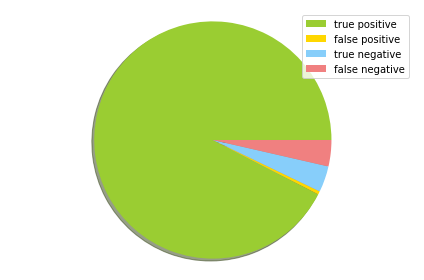

In [48]:
labels = 'true positive','false positive','true negative','false negative'
a,b,c,d=c_m3[0][0],c_m3[0][1],c_m3[1][0],c_m3[1][1]
sizes = [a,b,c,d]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

plt.show()

In [49]:
accuracy_score(y_test,predRF)

0.9599562020960426

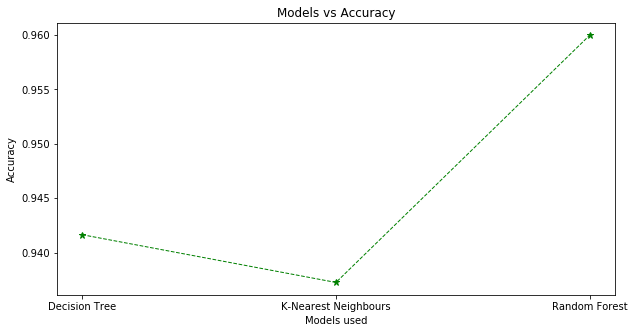

In [50]:
mod_accuracy=[accuracy_score(y_test,predDT),accuracy_score(y_test,predKNN),accuracy_score(y_test,predRF)]
models=["Decision Tree","K-Nearest Neighbours","Random Forest"]

plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'g*',linestyle='dashed',linewidth=1, markersize=7)
plt.xlabel("Models used")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
plt.show()

In [57]:
tp,fn,fp,tn = c_m3[0][0],c_m3[0][1],c_m3[1][0],c_m3[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2 * (recall * precision) / (recall + precision)
print("recall = ",recall)
print("precision = ", precision)
print("F1_score = ", f1score)

recall =  0.9951153781371063
precision =  0.962999185004075
F1_score =  0.9787939032471835


# Preparing test data

In [4]:
test_data = pd.read_csv('test_tweets.csv')

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [5]:
test_data.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [6]:
def process_tweet():
    return ",".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower().split()))

In [7]:
test_data['processed_tweets'] = test_data['tweet'].str.replace('[^A-Za-z0-9 ]', '')
test_data['processed_tweets'] = test_data['processed_tweets'].str.replace('@[a-zA-Z0-9]+', '')

#test_data['processed_tweet'] = test_data['tweet'].apply(process_tweet)

test_data.head(10)

,id,tweet,processed_tweets
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,user white supremacists want everyone to see ...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew el...
5,31968,choose to be :) #momtips,choose to be momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,something inside me dies eyes ness smokeyeye...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,finishedtattooinkedinkloveit thanksaleeee
8,31971,@user @user @user i will never understand why...,user user user i will never understand why my...
9,31972,#delicious #food #lovelife #capetown mannaep...,delicious food lovelife capetown mannaepicur...


In [8]:
drop_features(['tweet'],test_data)
test_data.head(10)

,id,processed_tweets
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacists want everyone to see ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...
5,31968,choose to be momtips
6,31969,something inside me dies eyes ness smokeyeye...
7,31970,finishedtattooinkedinkloveit thanksaleeee
8,31971,user user user i will never understand why my...
9,31972,delicious food lovelife capetown mannaepicur...


In [9]:
test_data['processed_tweets'] = test_data['processed_tweets'].apply(lambda x: x.split())
test_data.head(10)

,id,processed_tweets
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[user, white, supremacists, want, everyone, to..."
2,31965,"[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,"[is, the, hp, and, the, cursed, child, book, u..."
4,31967,"[3rd, bihday, to, my, amazing, hilarious, neph..."
5,31968,"[choose, to, be, momtips]"
6,31969,"[something, inside, me, dies, eyes, ness, smok..."
7,31970,"[finishedtattooinkedinkloveit, thanksaleeee]"
8,31971,"[user, user, user, i, will, never, understand,..."
9,31972,"[delicious, food, lovelife, capetown, mannaepi..."


In [10]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
test_data['processed_tweets']= test_data['processed_tweets'].apply(lambda x: [stemmer.stem(i) for i in x])
test_data.head(10)

,id,processed_tweets
0,31963,"[studiolif, aislif, requir, passion, dedic, wi..."
1,31964,"[user, white, supremacist, want, everyon, to, ..."
2,31965,"[safe, way, to, heal, your, acn, altwaystoh, h..."
3,31966,"[is, the, hp, and, the, curs, child, book, up,..."
4,31967,"[3rd, bihday, to, my, amaz, hilari, nephew, el..."
5,31968,"[choos, to, be, momtip]"
6,31969,"[someth, insid, me, die, eye, ness, smokeyey, ..."
7,31970,"[finishedtattooinkedinkloveit, thanksaleee]"
8,31971,"[user, user, user, i, will, never, understand,..."
9,31972,"[delici, food, lovelif, capetown, mannaepicur,..."


In [31]:
def process(text):
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    nopunc = " ".join(nopunc)
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

test_data['processed_tweets'] = test_data['processed_tweets'].apply(process)
test_data.head(10)

,id,processed_tweets
0,31963,"[requir, find, newmateri, passion, willpow, ai..."
1,31964,"[want, supremacist, whi, new, see, movi, bird,..."
2,31965,"[acn, altwaystoh, way, healthi, safe, heal]"
3,31966,"[harrypott, alreadi, favorit, hp, child, yes, ..."
4,31967,"[nephew, dave, amaz, bihday, hilari, uncl, lov..."
5,31968,"[choos, momtip]"
6,31969,"[someth, insid, smokeyey, grung, lone, tire, e..."
7,31970,"[finishedtattooinkedinkloveit, thanksaleee]"
8,31971,"[dad, whi, deep, inthefeel, left, young, never..."
9,31972,"[delici, lovelif, restur, food, mannaepicur, c..."


In [32]:
test_data['processed_tweets'] = test_data['processed_tweets'].apply(join_tokens)

In [55]:
train_data.tail(10)

,label,processed_tweets
31952,0,went far user
31953,0,morn bern good newyork genf girl berlincitygir...
31954,0,direct want holiday bull whatev domin
31955,0,ibizabringitonmallorcaholidayssumm 2 week user...
31956,0,2 year tomorrow fish wait time carnt user first
31957,0,youuu isz user ate
31958,0,airwav see tri wrap turner mantl shame shirley...
31959,0,morn work song otw listen sad monday
31960,1,condemn templ act sikh wso user calgari vandalis
31961,0,thank user follow


In [34]:
train_counts = count_vect.fit_transform(train_data['processed_tweets'])
test_counts = count_vect.transform(test_data['processed_tweets'])

print(train_counts.shape)
print(test_counts.shape)

(31962, 35051)
(17197, 35051)


In [35]:
train_tfidf = transformer.fit_transform(train_counts)
test_tfidf = transformer.transform(test_counts)

print(train_tfidf.shape)
print(test_tfidf.shape)

(31962, 35051)
(17197, 35051)


In [51]:
model3.fit(train_tfidf,train_data['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
predictions = model3.predict(test_tfidf)

In [54]:
final_result = pd.DataFrame({'id':test_data['id'],'label':predictions})
final_result.to_csv('output2.csv',index=False)